In [8]:
# Import libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import data and display

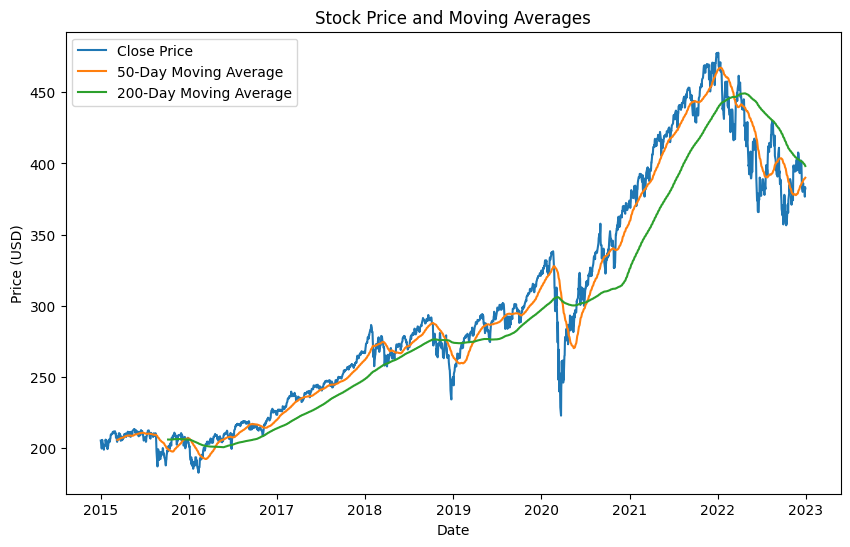

In [9]:
# Load preprocessed stock data
df = pd.read_csv('../data/preprocessed_stock_data.csv', index_col='Date', parse_dates=True)

# Plot the close price and moving averages
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_50'], label='50-Day Moving Average')
plt.plot(df['MA_200'], label='200-Day Moving Average')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Determining p, d, q

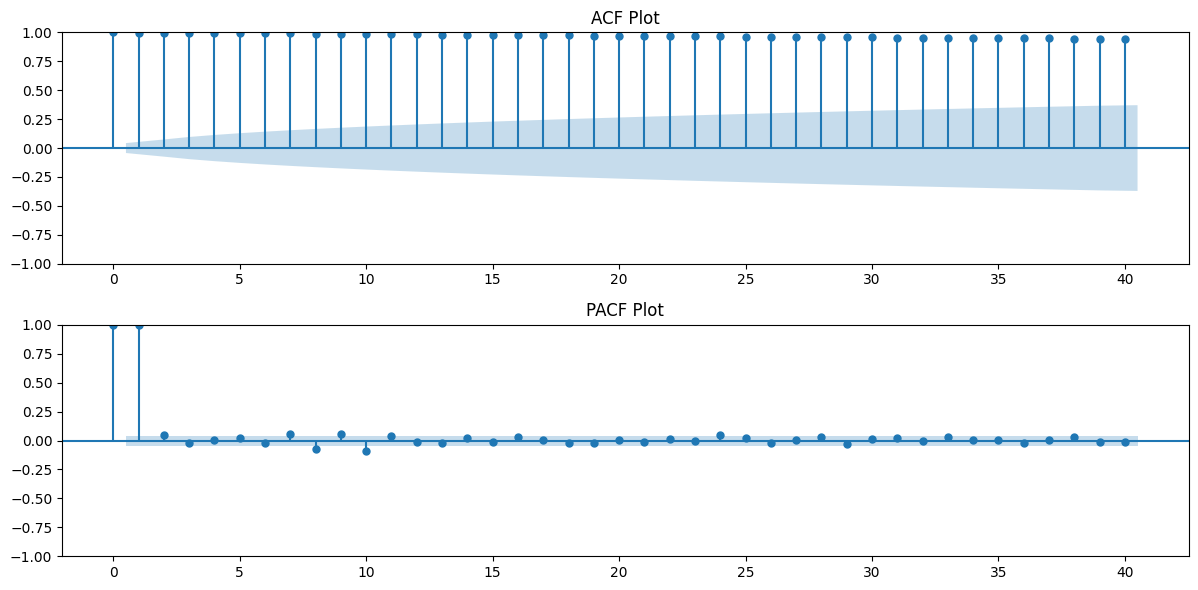

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(df['Close'], ax=plt.gca(), lags=40)
plt.title('ACF Plot')

plt.subplot(212)
plot_pacf(df['Close'], ax=plt.gca(), lags=40)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

## Grid search for optimal p, d, q

In [11]:
# Define the range for p, d, q
p = range(0, 3)  # Adjust as needed
d = range(0, 2)  # Usually 0 or 1
q = range(0, 3)  # Adjust as needed

# Create combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Fit models and select the best one based on AIC
best_aic = float('inf')
best_pdq = None

for param in pdq:
    try:
        model = sm.tsa.ARIMA(df['Close'], order=param, freq='B')
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print('Best ARIMA parameters:', best_pdq)

D:\work\TrendAnalysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\work\TrendAnalysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\work\TrendAnalysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\work\TrendAnalysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\work\TrendAnalysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be use

Best ARIMA parameters: (2, 1, 2)


In [12]:
# Train ARIMA model
arima_order = (1,1,1)#best_pdq  # Example ARIMA(p, d, q)
model = ARIMA(df['Close'], order=arima_order,freq='B',missing='drop')
arima_model = model.fit()

# Print summary of the model
print(arima_model.summary())

D:\work\TrendAnalysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2086
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5617.961
Date:                Sat, 16 Nov 2024   AIC                          11241.923
Time:                        17:17:21   BIC                          11258.850
Sample:                    01-02-2015   HQIC                         11248.125
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3820      0.088     -4.340      0.000      -0.554      -0.209
ma.L1          0.2924      0.092      3.174      0.002       0.112       0.473
sigma2        12.8205      0.182     70.470      0.0

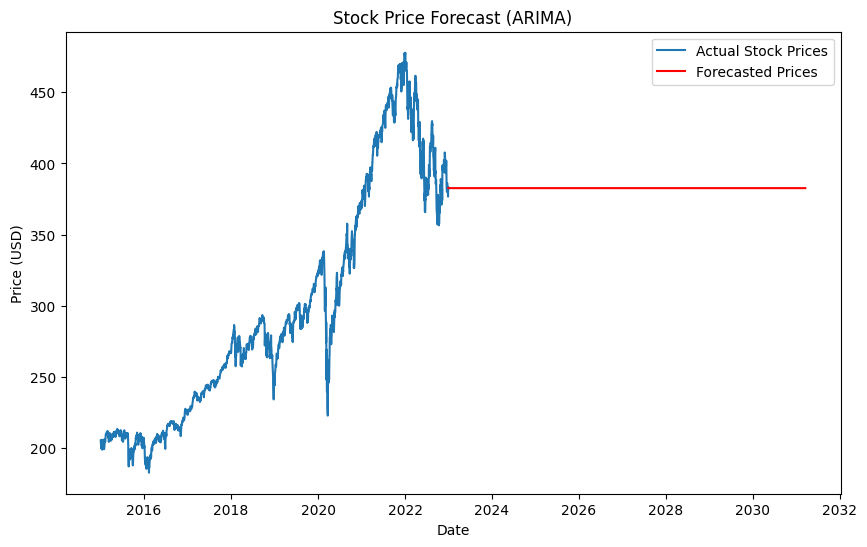

In [13]:
# Forecast future stock prices
forecast_steps = 3000  # Number of days to forecast
forecast = arima_model.forecast(steps=forecast_steps)

# Plot the forecasted results
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Actual Stock Prices')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='D'), forecast, label='Forecasted Prices', color='red')
plt.title('Stock Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

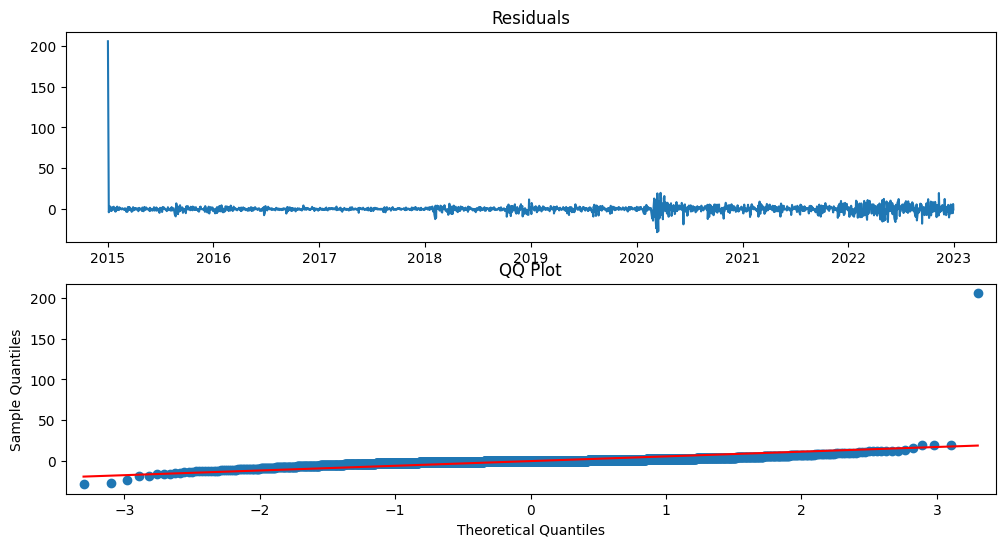

In [14]:
# Check residuals
residuals = arima_model.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('QQ Plot')
plt.show()